# Image Preprocessing

In [5]:
import cv2
import glob
import fingerprint_enhancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Oriented Gabor Filter Bank

In [3]:
IMAGE_PATH = '../dataset/'

def image_enhancement(img_name: str):
    img = cv2.imread('../dataset/' + img_name + '.tif', cv2.IMREAD_GRAYSCALE)						# read input image
    out = fingerprint_enhancer.enhance_fingerprint(img)		# enhance the fingerprint image

    plt.figure(figsize=(10, 5)) 

    plt.subplot(1, 2, 1)  # Create a 1x2 grid, and use the first subplot
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(out, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.title('Processed Image')  # Add a title
    plt.axis('off')  # Turn off axis labels

    plt.show()  # Display the image

--------------------Begin Image 103--------------------


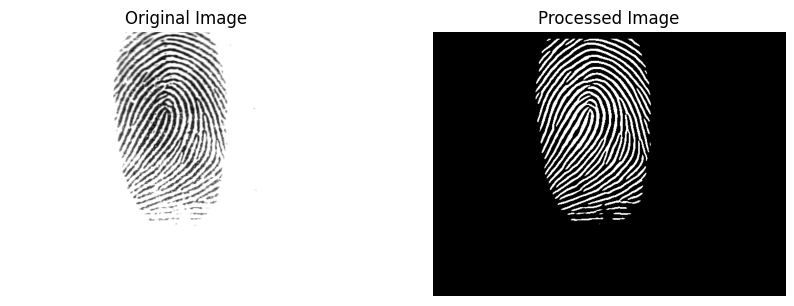

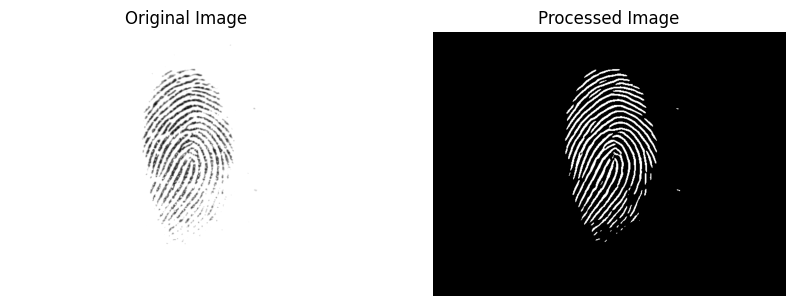

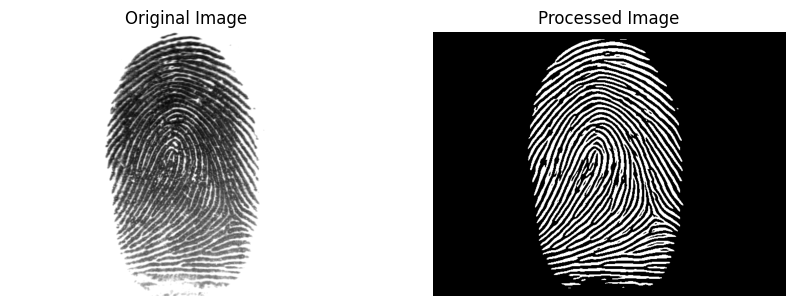

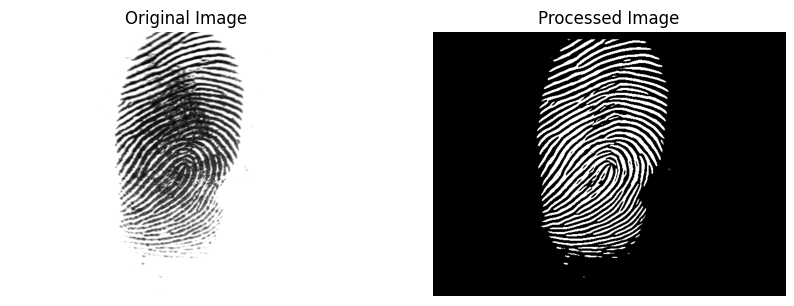

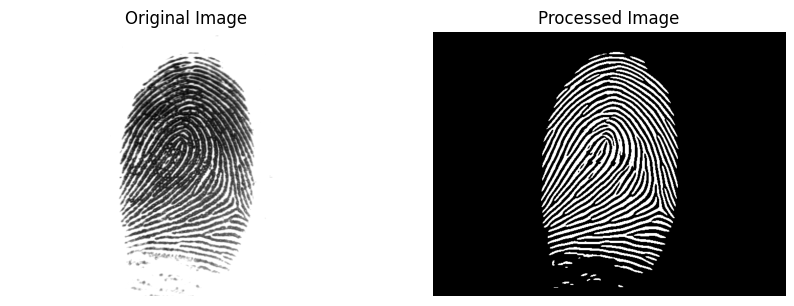

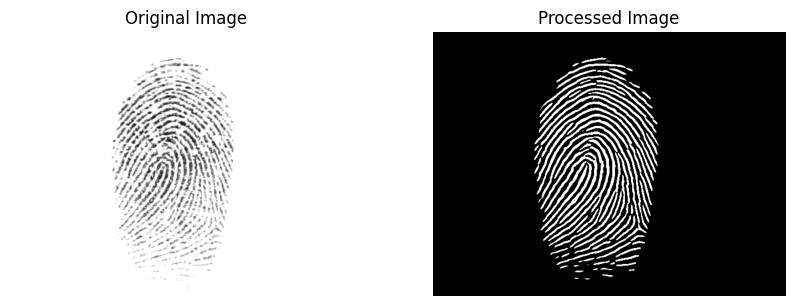

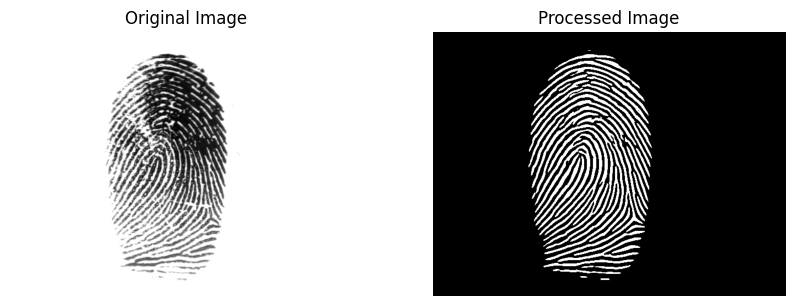

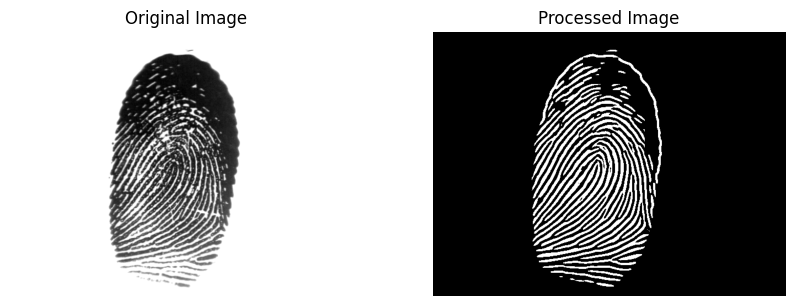

--------------------End Image 103--------------------
--------------------Begin Image 107--------------------


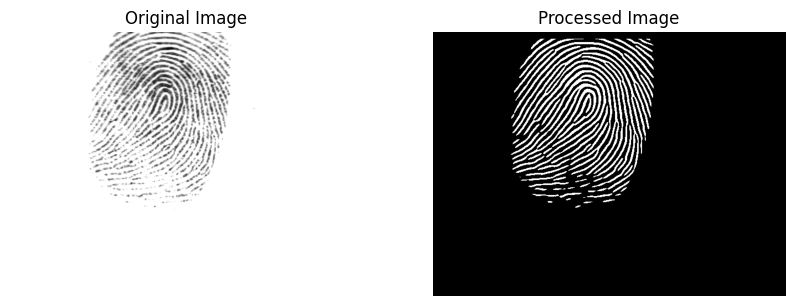

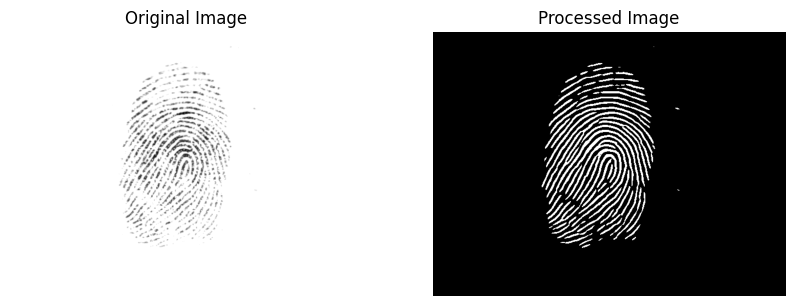

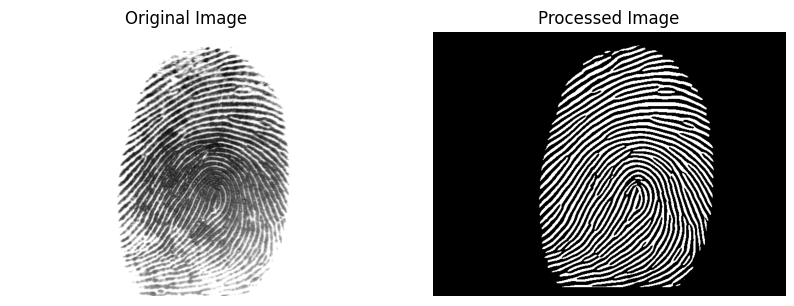

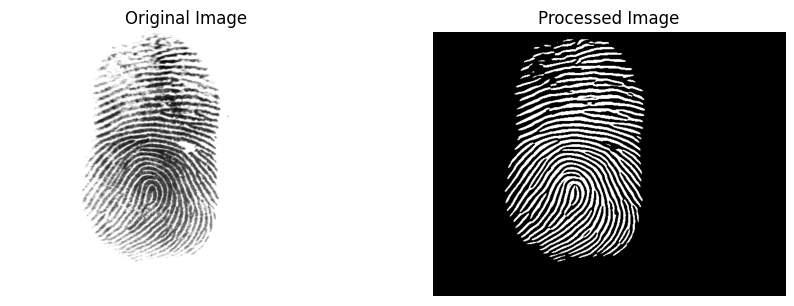

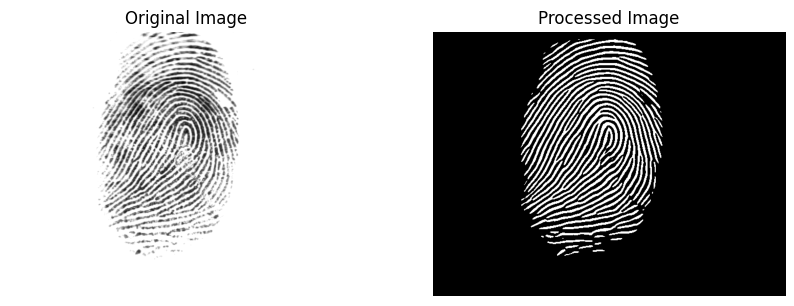

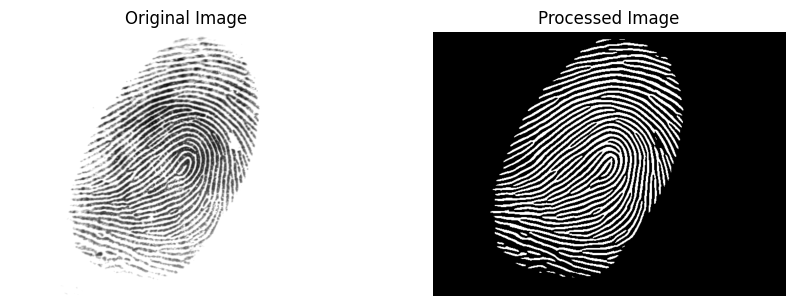

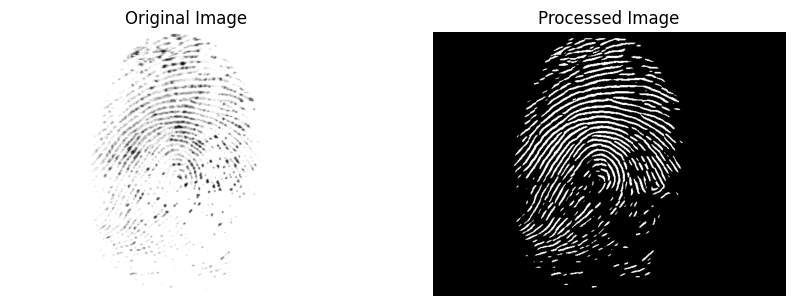

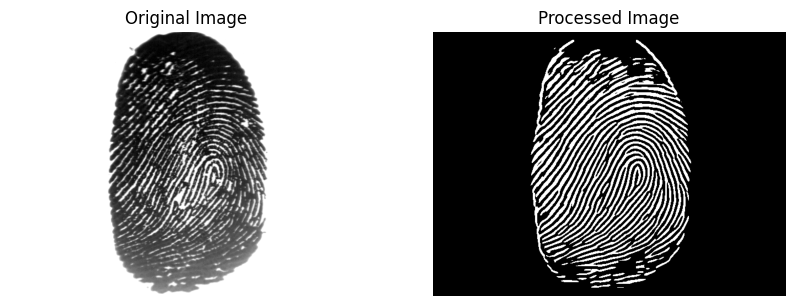

--------------------End Image 107--------------------
--------------------Begin Image 108--------------------


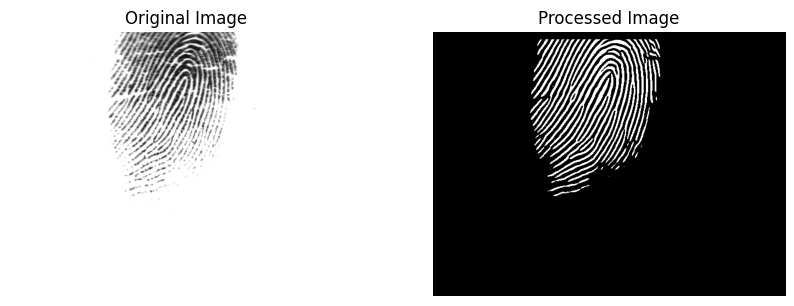

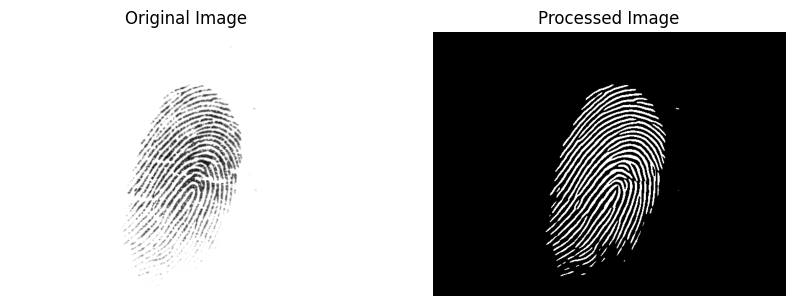

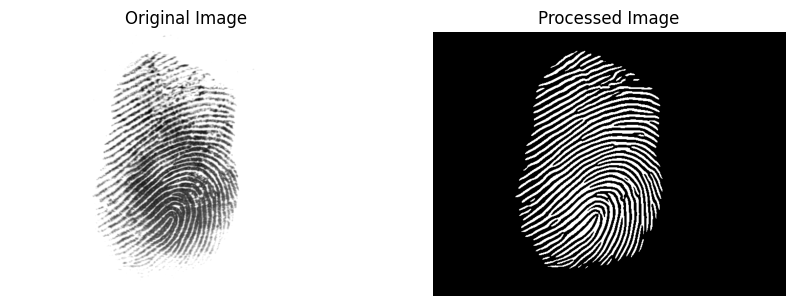

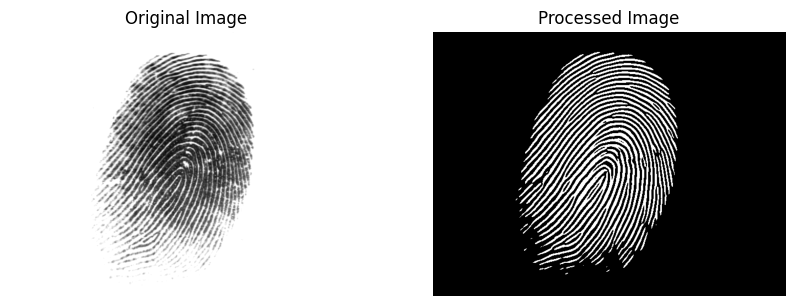

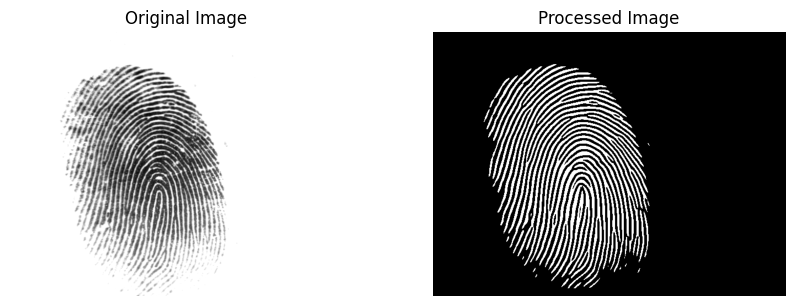

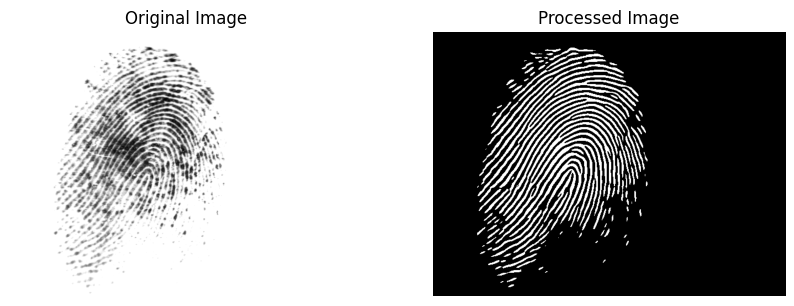

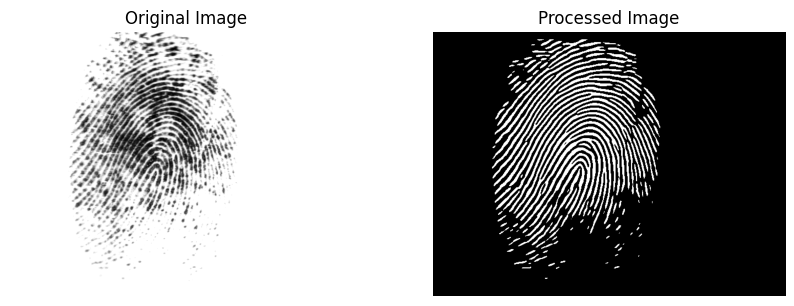

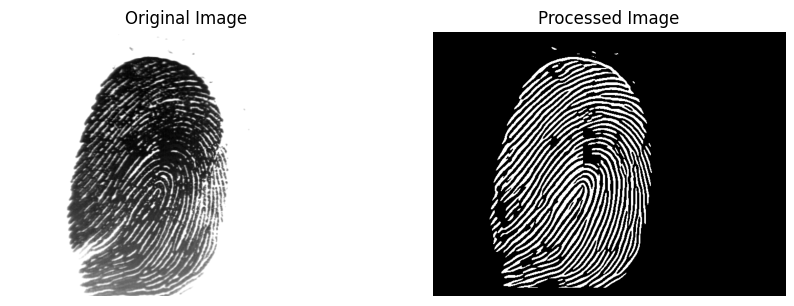

--------------------End Image 108--------------------
--------------------Begin Image 109--------------------


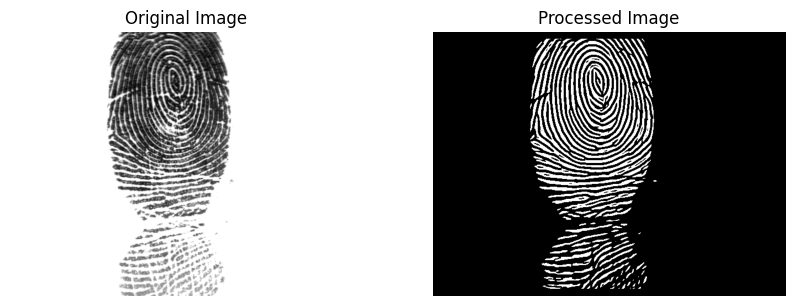

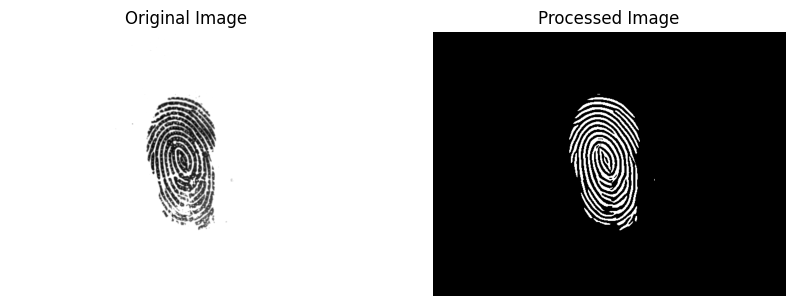

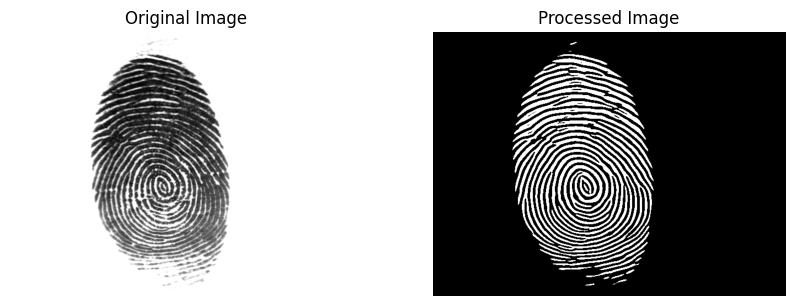

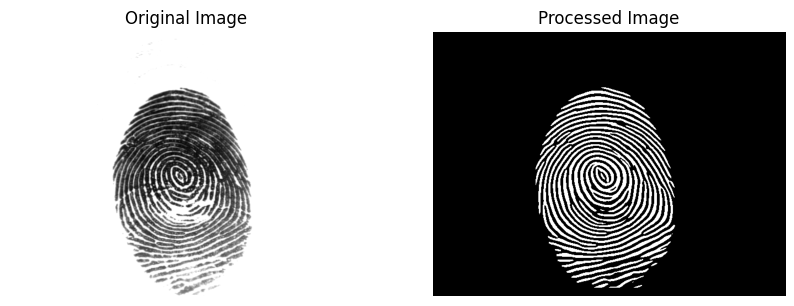

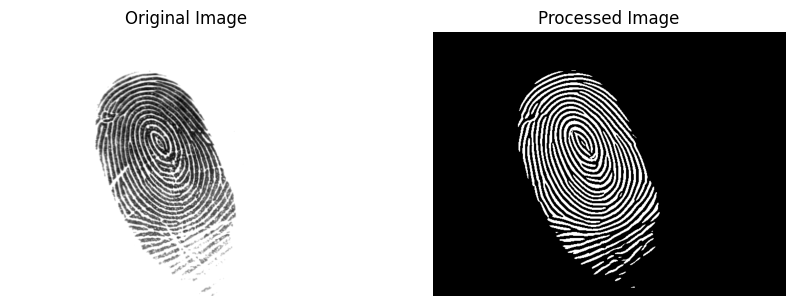

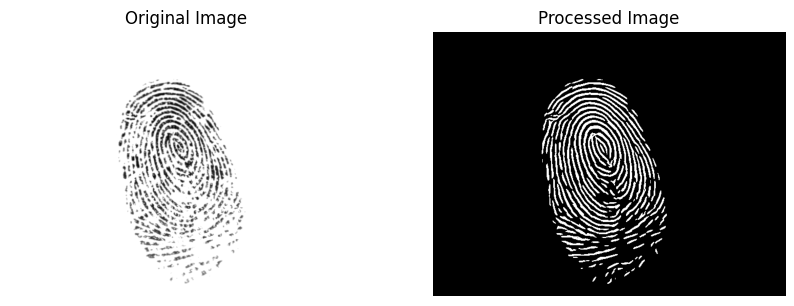

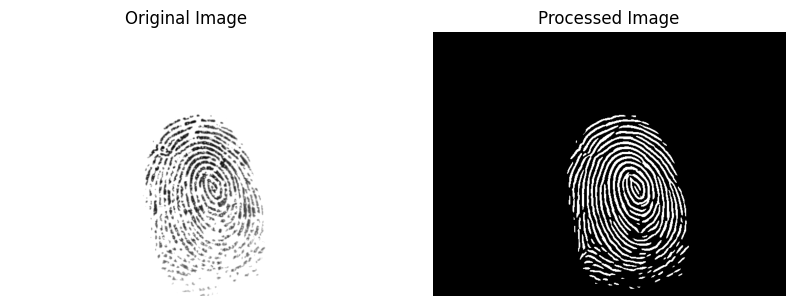

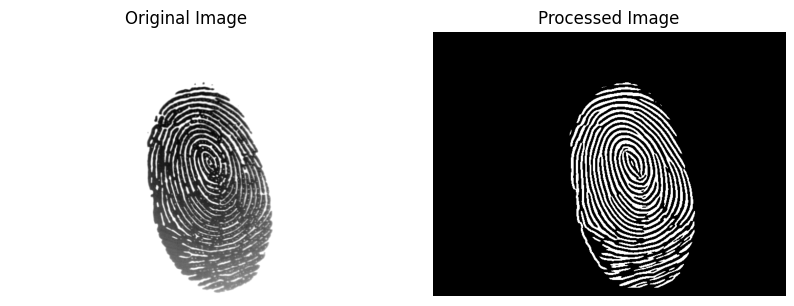

--------------------End Image 109--------------------


In [4]:
while True:
    image_index = int(input())
    if image_index == -1:
        break
    else:
        print('-'*20 + f"Begin Image 10{image_index}" + '-'*20)
        for i in range(1,9):
            image_enhancement('10'+str(image_index)+'_'+str(i))
        print('-'*20 + f"End Image 10{image_index}" + '-'*20)

## Handle Rotated Images

In [14]:

# Load the fingerprint image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Detect the contour of the fingerprint
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Find the largest contour (assumed to be the fingerprint)
    largest_contour = max(contours, key=cv2.contourArea)

    # Step 2: Calculate orientation using image moments
    moments = cv2.moments(largest_contour)
    if moments['mu20'] != 0:
        angle = 0.5 * np.arctan2(2 * moments['mu11'], moments['mu20'] - moments['mu02'])
        rotation_angle = np.rad2deg(angle)
    else:
        rotation_angle = 0
    print(f"Detected Rotation Angle: {rotation_angle:.2f}°")

    # Step 3: Rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, -rotation_angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC)

    # Step 4: Crop the fingerprint area (remove black borders)
    mask = cv2.warpAffine(binary, rotation_matrix, (w, h))
    x, y, w, h = cv2.boundingRect(mask)
    cropped_rotated_image = rotated_image[y:y+h, x:x+w]

    # Define ROI (adjust coordinates if necessary)
    roi = cropped_rotated_image[50:300, 50:200]  # Adjust based on your image
else:
    print("No fingerprint detected!")
    rotated_image = image.copy()
    roi = rotated_image.copy()

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Rotated Image")
plt.imshow(rotated_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Region of Interest (ROI)")
plt.imshow(roi, cmap='gray')
plt.show()


No fingerprint detected!


AttributeError: 'NoneType' object has no attribute 'copy'